<a href="https://colab.research.google.com/github/sofiasilingardi16/Misogyny-Repeated-and-Reposted/blob/main/Coding_SUB_RQ_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install praw vaderSentiment pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.5 MB/s eta 0:00:00


In [3]:
!pip install python-dotenv

In [7]:
import os
from dotenv import load_dotenv

load_dotenv()

print(f"REDDIT_CLIENT_ID: {os.getenv('REDDIT_CLIENT_ID')}")
print(f"REDDIT_CLIENT_SECRET: {os.getenv('REDDIT_CLIENT_SECRET')}")
print(f"REDDIT_USER_AGENT: {os.getenv('REDDIT_USER_AGENT')}")

REDDIT_CLIENT_ID: None
REDDIT_CLIENT_SECRET: None
REDDIT_USER_AGENT: None


In [ ]:
url = "https://www.reddit.com/r/AreTheStraightsOK/comments/ih6bfm/women_only_become_astronauts_to_make_sandwiches/" #Collecting the comments
submission = reddit.submission(url=url)
submission.comments.replace_more(limit=None)
comments = [c.body for c in submission.comments.list()]
print(f"Pulled {len(comments)} comments")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Pulled 43 comments


In [ ]:
analyzer = SentimentIntensityAnalyzer() # Running Vader Sentiment Analysis
data = []
for txt in comments:
    scores = analyzer.polarity_scores(txt)
    data.append({"comment": txt, **scores})

comment_df = pd.DataFrame(data)

In [ ]:
print(comment_df[["pos","neu","neg","compound"]].describe())

             pos        neu        neg   compound
count  43.000000  43.000000  43.000000  43.000000
mean    0.120907   0.812256   0.066767   0.167607
std     0.141119   0.151908   0.106223   0.443719
min     0.000000   0.361000   0.000000  -0.685500
25%     0.000000   0.723000   0.000000   0.000000
50%     0.094000   0.816000   0.000000   0.226300
75%     0.208500   0.953000   0.110500   0.584300
max     0.639000   1.000000   0.412000   0.817600


In [ ]:
# Labeling each comment

comment_df["sentiment"] = pd.cut(
    comment_df["compound"], # Changed df to comment_df
    bins=[-1.01, -0.05, 0.05, 1.01],
    labels=["negative", "neutral", "positive"]
)

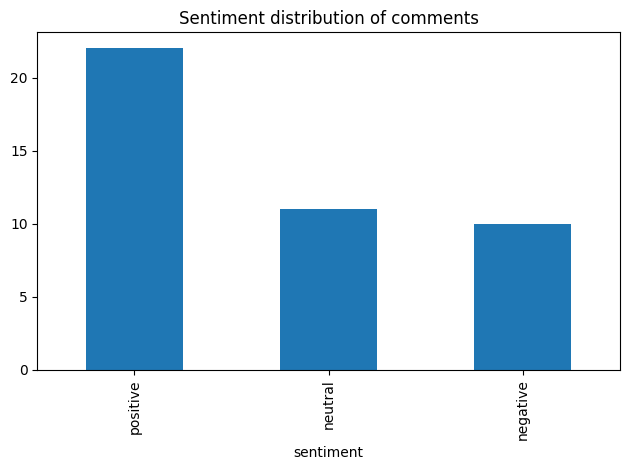

In [ ]:
# Visualizing the Distribution
(comment_df["sentiment"]
     .value_counts()
     .reindex(["positive","neutral","negative"])
     .plot(kind="bar", title="Sentiment distribution of comments"))
plt.tight_layout()
plt.show()